## Day 32 Lecture 1 Assignment

In this assignment, we will learn about K nearest neighbor regression. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

The meaning of the different columns can be found here: https://www.kaggle.com/tonypriyanka2913/employee-absenteeism

In [47]:
%matplotlib inline

import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [15]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [16]:
absent.shape

(740, 21)

In [17]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [18]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

Find which variables have the highest pairwise correlation and remove them from our dataset. Additionally, try to think of which variables are correlated by looking at the column names and remove those columns as well.

Note: When choosing between two categorical variables that are correlated, you often want to keep the one with fewer unique values. Why might that be? (Think about the cons of KNN.)

In [20]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [21]:
#The only variable that correaltes with another is bmi to weight
absent.drop(['Body mass index'], axis=1, inplace=True)

Figure out which columns actually contain sneaky categorical variables and turn those into dummy variables.

In [33]:
# answer below:
absent.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Absenteeism time in hours          19
dtype: int64

In [44]:
absent_ = pd.get_dummies(absent, columns=[
                                      'Seasons',
                                      'Education',
                                      'Social drinker',
                                      'Social smoker',
                                      'Disciplinary failure'], drop_first=True)

In [46]:
#I drop all of these colmuns
absent_.drop(['ID'], axis=1, inplace=True)
absent_.drop(['Son'], axis=1, inplace=True)
absent_.drop(['Pet'], axis=1, inplace=True)
absent_.drop(['Day of the week'], axis=1, inplace=True)

absent_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               740 non-null    int64  
 1   Month of absence                 740 non-null    int64  
 2   Transportation expense           740 non-null    int64  
 3   Distance from Residence to Work  740 non-null    int64  
 4   Service time                     740 non-null    int64  
 5   Age                              740 non-null    int64  
 6   Work load Average/day            740 non-null    float64
 7   Hit target                       740 non-null    int64  
 8   Weight                           740 non-null    int64  
 9   Height                           740 non-null    int64  
 10  Absenteeism time in hours        740 non-null    int64  
 11  Seasons_2                        740 non-null    uint8  
 12  Seasons_3             

Split the data into train and test with test containing 20% of the data, then scale your features.

In [51]:
# answer below:# I will make Month of absence my target
from sklearn.model_selection import train_test_split
X = absent_.drop(['Month of absence'], axis=1)
y = absent['Month of absence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

Train a series of KNN regression models with a range of K values. For each K value, use cross validation of the training set and find the average RMSE score. Make a plot of K versus average RMSE. What is the best value of K?

In [54]:
# answer below
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

#create lists for K-values, train errors, and test errors
k_list = np.arange(1, 15, 2)
train_errors = []
test_errors = []

for i in k_list:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred_train = neigh.predict(X_train)
    y_pred_test = neigh.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_pred_train, squared=False))
    test_errors.append(mean_squared_error(y_test, y_pred_test, squared=False))

In [55]:
print(train_errors)

[0.0, 1.8464924951200141, 2.2165989287218406, 2.4223034034298974, 2.540705482935337, 2.6292530985345772, 2.722266123697837]


In [56]:
print(test_errors)

[2.6850436606244337, 2.5660933020517467, 2.579702476035728, 2.740676417527786, 2.8356141088026607, 2.9159547404317845, 2.987205511770259]


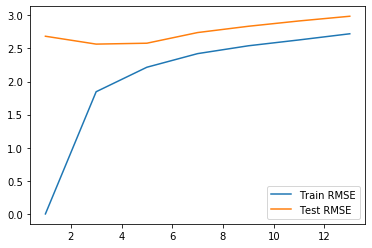

In [58]:
plt.plot(k_list, train_errors, label='Train RMSE')
plt.plot(k_list, test_errors, label='Test RMSE')
plt.legend()
plt.show()

Using your best K, fit a model to all your training data and show the RMSE for the training and testing sets.

In [59]:
# answer below I think my best K-value is at 5, 
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred_train = neigh.predict(X_train)
y_pred_test = neigh.predict(X_test)
print(mean_squared_error(y_train, y_pred_train, squared=False))
print(mean_squared_error(y_test, y_pred_test, squared=False))

2.2165989287218406
2.579702476035728


Create a homoscedasticity plot (also called residual plot). How is your model performing? What ideas do you have to improve the model?

In [ ]:
# answer below

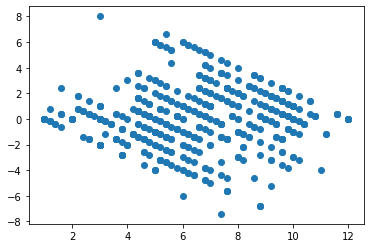

In [62]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred_train = neigh.predict(X_train)
residual = y_train - y_pred_train

plt.scatter(y_pred_train, residual)
plt.show()